In [1]:
# importing libraries 

import hashlib
from imageio import imread 
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
import numpy as np

In [2]:
# sklearn has lbp enable feature

from skimage import feature

In [3]:
import time

In [4]:
# sequential time
start = time.perf_counter()

In [5]:
def lbp_features(img , radius = 1, sampling_pixels=8):
    
    # LBP operates in single channel images so if RGB images are provided
    # we have to convert it to grayscale
    if (len(img.shape) >2):
        img = img.astype(float)
        # RGB to grayscale convertion using Luminance
        img = img[:,:,0]*0.3 + img[:,:,1]*0.59 + img[:,:,2]*0.11
        
    # converting to unside_int8 (uint8) type for 256 graylevels
    img = img.astype(np.uint8)
    
    # normalize values can also help improving description 
    i_min = np.min(img)
    i_max = np.max(img)
    if (i_max -i_min !=0):
        img = (img - i_min)/(i_max - i_min)
        
    #compute LBP
    lbp = feature.local_binary_pattern(img, sampling_pixels, radius, method = "uniform")
    
    # LBP returns a matrix with the codes, so we compute the histogram
    (hist, _) = np.histogram(lbp.ravel(), bins = np.arange(0, sampling_pixels +3), range=(0,255))
    
    #normalization
    hist = hist.astype("float")
    hist /= (hist.sum() + 1e-6)
    #return the histogram of local binary patterns
    return hist


def Euclidean_distance(p,q):
    dist = np.sqrt(np.sum(np.square(p-q)))
    return dist
    

In [6]:
import os 
os.getcwd()

'C:\\Users\\Agupta\\Downloads\\duplicate image detection'

In [7]:
os.chdir(r'..\\100_Images_Lab')

In [8]:
files_list=os.listdir()
len(files_list)

107

In [9]:
import hashlib, os 
import imageio
img = []
lbp_n =[]


for index, filename in enumerate(os.listdir('.')):
    if os.path.isfile(filename):
        with open(filename,'rb') as f:
            img.append(imageio.imread(f.read()))            

In [10]:
import hashlib, os 
import imageio
duplicates = []
hash_keys =dict()
hash_code=[]
for index in range(len(img)):
    image_num = hashlib.md5(img[index]).hexdigest()
    hash_code.append(image_num)
    if image_num not in hash_keys:
        hash_keys[image_num] = index
    else :
        duplicates.append((index,hash_keys[image_num]))

In [11]:
# print(hash_code)

In [12]:
#print(hash_keys)

In [13]:
duplicates

[(28, 27), (41, 40), (68, 67), (80, 79), (84, 83), (87, 86), (99, 98)]

In [14]:
for i in range (len(img)):
    lbp_n.append(lbp_features(img[i],2,8))

In [15]:
# compute euclidean distance
dQ_H = []
for i in range (len(img)):
    for j in range (len(img)):
        dQ_H.append(Euclidean_distance(lbp_n[i],lbp_n[j]))

In [16]:
print(dQ_H[0],dQ_H[54],dQ_H[55])

0.0 0.32942877016066985 0.3045353468772221


In [17]:
hash_keys.values()

dict_values([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 81, 82, 83, 85, 86, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 100, 101, 102, 103, 104, 105, 106])

In [18]:
dup = []
for i in range (len(img)):
    for j in range (len(img)):
        if dQ_H[i] == dQ_H[j] and hash_code[i]==hash_code[j] and i != j:
            dup.append((i,j))

In [19]:
print(len(dup))
print(dup)

14
[(27, 28), (28, 27), (40, 41), (41, 40), (67, 68), (68, 67), (79, 80), (80, 79), (83, 84), (84, 83), (86, 87), (87, 86), (98, 99), (99, 98)]


In [20]:
s_time = time.perf_counter()

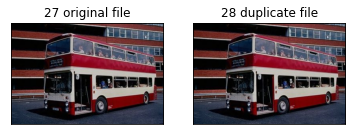

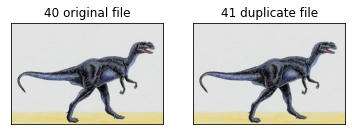

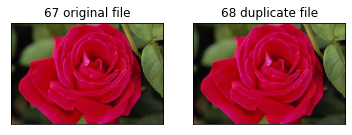

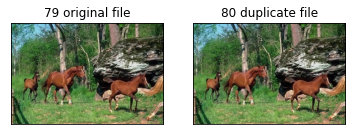

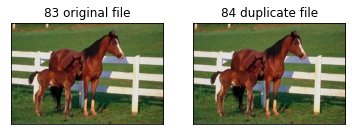

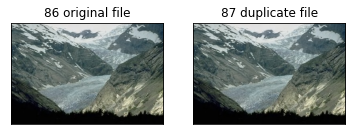

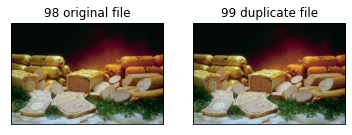

In [21]:
for file_indexes in duplicates[:30]:
    try:
        plt.subplot(121),plt.imshow(imread(files_list[file_indexes[1]]))
        plt.title(str(file_indexes[1])+' original file'), plt.xticks([]), plt.yticks([])
        
        plt.subplot(122),plt.imshow(imread(files_list[file_indexes[0]]))
        plt.title(str(file_indexes[0])+' duplicate file'), plt.xticks([]), plt.yticks([])
        plt.show()
        
    except OSError as e:
        continue

In [22]:
import imageio

img1=imageio.imread('..\\100_Images_Lab\\1.jpg')
img2=imageio.imread('..\\100_Images_Lab\\80 - Copy.jpg')
img3=imageio.imread('..\\100_Images_Lab\\80.jpg')
img4=imageio.imread('..\\100_Images_Lab\\31.jpg')
img5=imageio.imread('..\\100_Images_Lab\\32.jpg')
img6=imageio.imread('..\\100_Images_Lab\\4.jpg')

lbp1=lbp_features(img1,2,8)
lbp2=lbp_features(img2,2,8)
lbp3=lbp_features(img3,2,8)
lbp4=lbp_features(img4,2,8)
lbp5=lbp_features(img5,2,8)
lbp6=lbp_features(img6,2,8)

dQ1_H = Euclidean_distance(lbp1,lbp2)
dQ2_H = Euclidean_distance(lbp1,lbp3)
dQ3_H = Euclidean_distance(lbp1,lbp4)
dQ4_H = Euclidean_distance(lbp1,lbp6)
dQ5_H = Euclidean_distance(lbp1,lbp6)
dQ6_H = Euclidean_distance(lbp1,lbp1)
            

In [23]:
dQ7_H = Euclidean_distance(lbp2,lbp1)
dQ7_H

0.2701150634316286

Text(0.5, 1.0, 'rank 5: 0.3440')

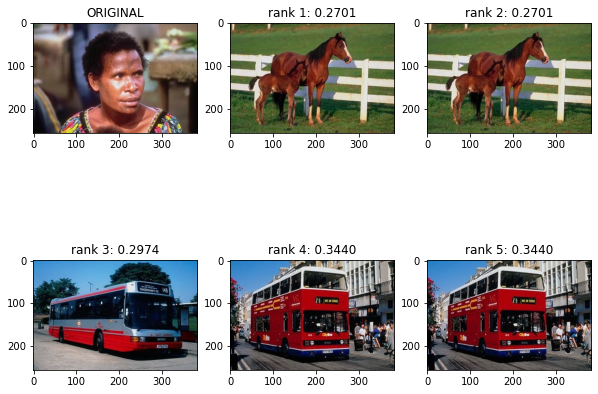

In [24]:
plt.figure(figsize =(10,8))
plt.subplot(231); plt.imshow(img1) ; plt.title('ORIGINAL')
plt.subplot(232); plt.imshow(img2) ; plt.title('rank 1: %.4f' %dQ1_H)
plt.subplot(233); plt.imshow(img3) ; plt.title('rank 2: %.4f' %dQ2_H)
plt.subplot(234); plt.imshow(img4) ; plt.title('rank 3: %.4f' %dQ3_H)
plt.subplot(235); plt.imshow(img5) ; plt.title('rank 4: %.4f' %dQ4_H)
plt.subplot(236); plt.imshow(img5) ; plt.title('rank 5: %.4f' %dQ5_H)

(-0.8900000000000001, 9.89, 0.0, 0.2710128784152119)

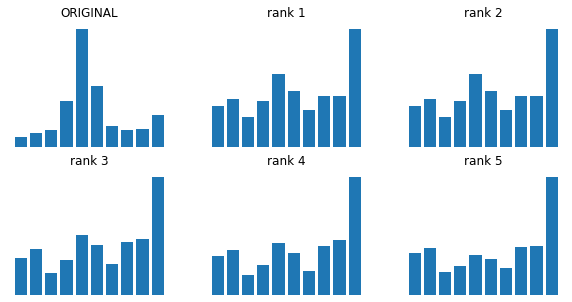

In [25]:
vals = range(len(lbp1))
plt.figure(figsize =(10,5))
plt.subplot(231); plt.bar(vals,lbp1);
plt.title('ORIGINAL'); plt.axis('off')

plt.subplot(232); plt.bar(vals,lbp2);
plt.title('rank 1'); plt.axis('off')

plt.subplot(233); plt.bar(vals,lbp3);
plt.title('rank 2'); plt.axis('off')

plt.subplot(234); plt.bar(vals,lbp4);
plt.title('rank 3'); plt.axis('off')

plt.subplot(235); plt.bar(vals,lbp5);
plt.title('rank 4'); plt.axis('off')

plt.subplot(236); plt.bar(vals,lbp6);
plt.title('rank 5'); plt.axis('off')

In [26]:
e_time = time.perf_counter()

In [27]:
print(f'time to process = {(e_time-s_time)} seconds')

time to process = 4.109393000000001 seconds


In [28]:
files_list=os.listdir()
len(files_list)

107

In [29]:
end = time.perf_counter()

In [30]:
print(f'Sequential time = {round(end-start,2)} seconds')

Sequential time = 11.5 seconds


In [31]:
# delete duplicate files 
""""
for index in duplicates:
    os.remove(files_list[index[0]]) """

'"\nfor index in duplicates:\n    os.remove(files_list[index[0]]) '